### Read in the data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM

zmin = 0.1
zmax = 0.9
survey_area = 0.11 # square degrees, zfourge
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
mlim = 27 # CDFS apparent magnitude limit

# Read in CDFS main data
data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data) # 30,911 galaxies
df = df[df['Use'] == 1] # 13,299 galaxies
df = df[df['zpk'] >= zmin]
df = df[df['zpk'] <= zmax]
print(len(df))

z = df['zpk']
app_mag = df['FKs'] # apparent magnitude

3867


### Convert from flux to luminosities

In [31]:
# def fluxtolum(z, fl):
#     """Converts flux density [uJy] to  luminosity [erg/s]"""
#     # print ' fl is assumed to be in uJy'
#     ld = cosmo.luminosity_distance(z)  # ld[Mpc]
#     ld *= (3.086 * 10 ** 22)  # ld[m]
#     flsi = fl * 1e-32  # [W/m^2/Hz]
#     lum = (4 * np.pi * ld ** 2) * flsi / (1 + z) * 1e7  # W -> erg/s
#     return lum

# mag_ab = 25 - 2.5*np.log10(flux) # AB magnitude
# lum = fluxtolum(z, mag_ab)
# lum = np.log10(lum)

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
dists = cosmo.comoving_distance(z).value # Mpc
ab_mag = 25 - 2.5*np.log10(app_mag) # AB magnitude
abs_mag = ab_mag - 5 * np.log10(dists / 10) # absolute magnitude
lum = abs_mag

### Uncorrected luminosity function

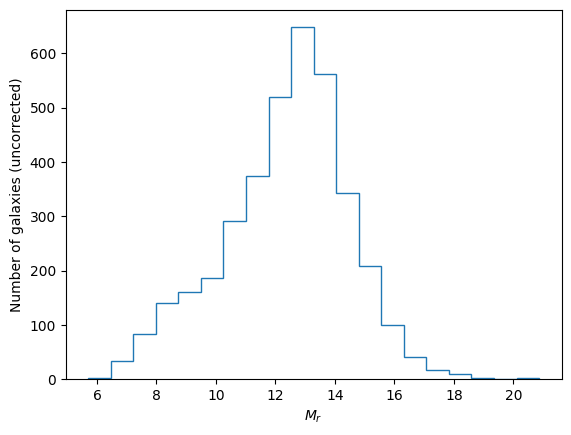

Number of galaxies in each bin: [  2.  34.  84. 140. 161. 187. 292. 374. 520. 648. 562. 343. 208. 100.
  41.  18.  10.   3.   1.   2.]


In [64]:
counts, bin_edges, _ = plt.hist(lum, bins=20, histtype='step')
plt.xlabel('$M_r$')
plt.ylabel('Number of galaxies (uncorrected)')
plt.show()
print('Number of galaxies in each bin:', counts)

### Distances

`dmins` is the co-moving distance of the target at the minimum of the redshift bin

`dmaxs` is the co-moving distance of the target where its flux reaches the survey limit

[152481.18540381 107554.3134714   75864.640714    53511.97478653
  37745.2712964   26624.05024151  18779.57229917  13246.38184426
   9343.48392863   6590.53113152   4648.70501489   3279.01619523
   2312.89083178   1631.4234762    1150.74283755    811.68936054
    572.53418967    403.84340891    284.85547565    200.92600304]
[3053.34660668 3053.34660668 3053.34660668 3053.34660668 3053.34660668
 3053.34660668 3053.34660668 3053.34660668 3053.34660668 3053.34660668
 3053.34660668 3053.34660668 2312.89083178 1631.4234762  1150.74283755
  811.68936054  572.53418967  403.84340891  284.85547565  200.92600304]


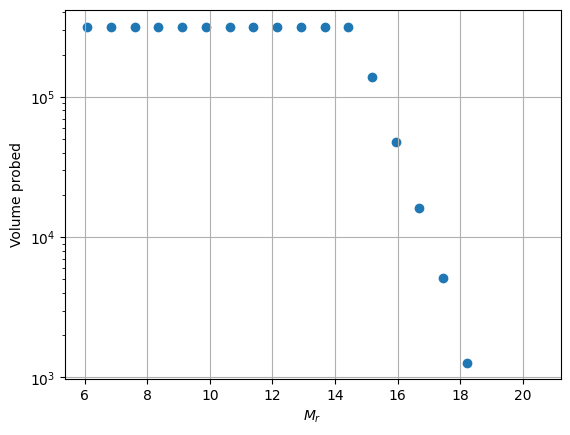

In [56]:
bin_centers = bin_edges[0:-1] + np.diff(bin_edges)[0] / 2

dmin = cosmo.comoving_distance(zmin).value
dmaxs = 10 * 10 ** ((mlim - bin_centers) / 5) # * 10 ** -6
# dmaxs = 10 ** ((mlim - bin_centers - 25) / 5)
print(dmaxs)

dmaxs[dmaxs > cosmo.comoving_distance(zmax).value] = cosmo.comoving_distance(zmax).value
print(dmaxs)

vmaxs = 4/3 * np.pi * dmaxs**3
vmins = 4/3 * np.pi * dmin**3
vol = (vmaxs - vmins) * survey_area / (41253.0)

# Plot the volume probed as a function of mabs
plt.scatter(bin_centers,vol)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('Volume probed')
plt.grid()

In [2]:
# corrected luminosity function
lf=counts/vol
plt.scatter(bin_centers,lf)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi$')

NameError: name 'counts' is not defined